In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Define your OpenWeatherMap API key
api_key = "8d735efa5439939d08840a72aaae409c"

# Define the base URL for the 5-day 3-hour forecast API
base_url = "https://api.openweathermap.org/data/2.5/forecast"

In [3]:
cities = ['Nairobi', 'Mombasa', 'Kisumu',]

In [4]:
weather_data_dict = {}

In [5]:
for city in cities:
    params = {
        'q': city,  # City name
        'appid': api_key,  # Your API key
        'units': 'metric',  # Use metric units for temperature
        'cnt': 40  # Number of forecast data points (8 data points per day for 5 days)
    }

In [6]:
    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        weather_data = response.json()
        
        # Initialize lists to store data
        dates = []
        temperatures = []
        humidities = []
        wind_speeds = []
        precipitations = []

In [7]:
for entry in weather_data['list']:
    # Extract timestamp and convert to date
    dt = pd.to_datetime(entry['dt'], unit='s')
    # Append data only for the next 5 days
    if dt.date() <= pd.Timestamp.today().date() + pd.Timedelta(days=5):
        dates.append(dt)
        temperatures.append(entry['main']['temp'])  # Temperature in Celsius
        humidities.append(entry['main']['humidity'])  # Humidity in percentage
        wind_speeds.append(entry['wind']['speed'])  # Wind speed in m/s
        precipitations.append(entry.get('rain', {}).get('1h', 0))  # Precipitation in mm (1 hour)
    else:
        print(f"Failed to retrieve data for {city}: {response.status_code}")

# Create a pandas DataFrame from the collected data
weather_data_dict[city] = pd.DataFrame({
    'Date': dates,
    'Temperature (C)': temperatures,
    'Humidity (%)': humidities,
    'Wind Speed (m/s)': wind_speeds,
    'Precipitation (mm)': precipitations
})

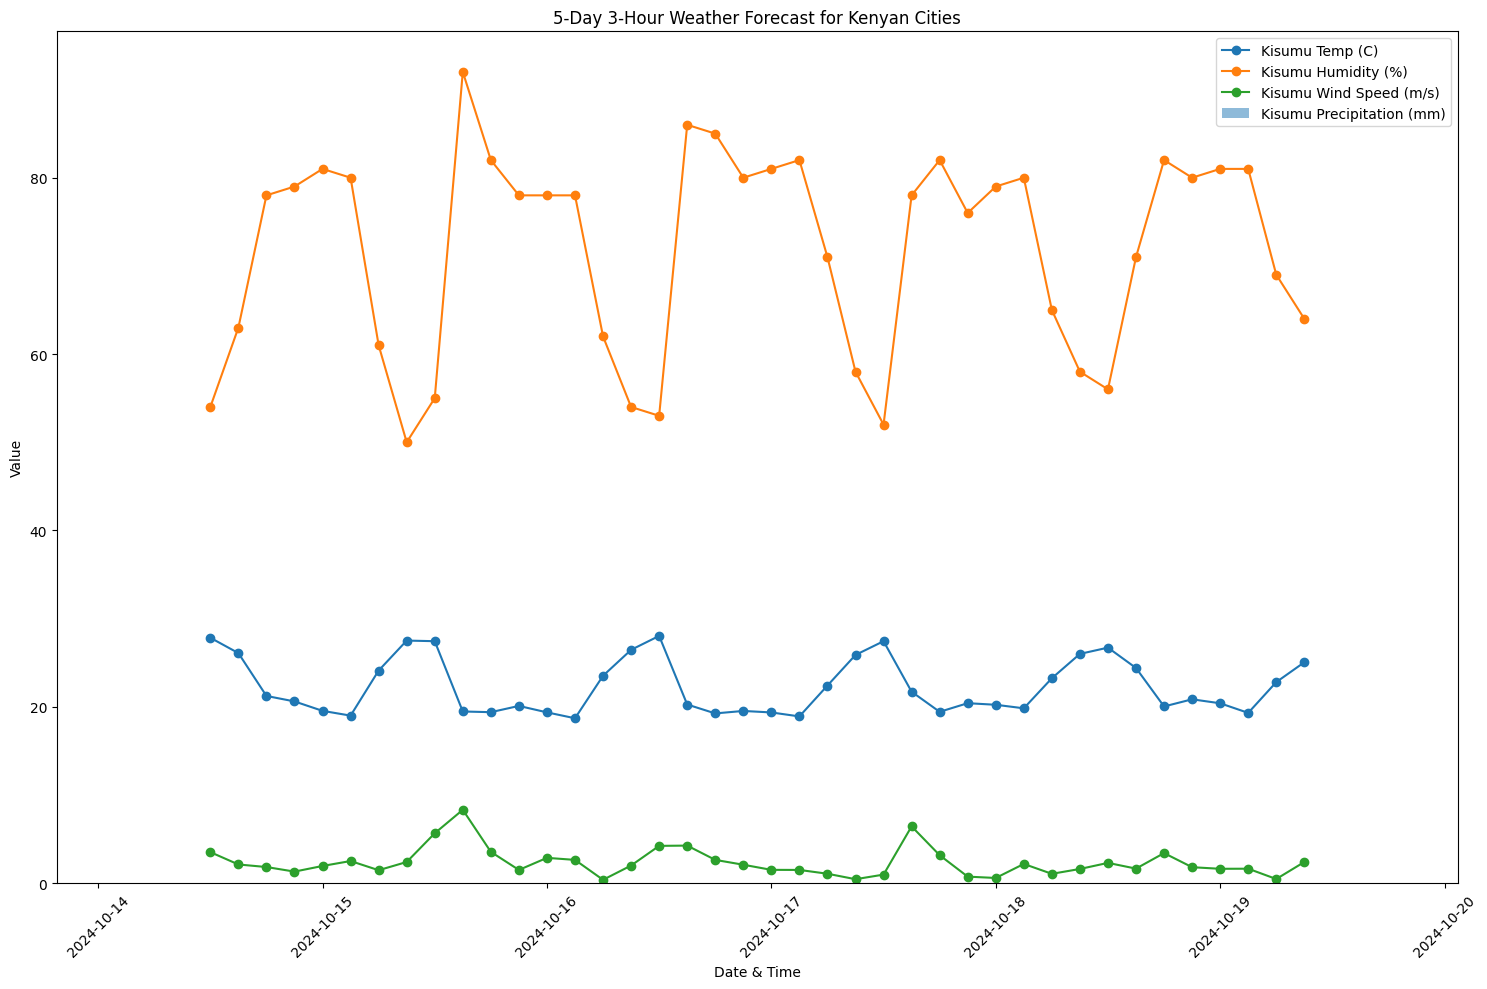

In [8]:
# Plot the weather data for each city
plt.figure(figsize=(15, 10))

for city, df in weather_data_dict.items():
    # Plot temperature
    plt.plot(df['Date'], df['Temperature (C)'], label=f'{city} Temp (C)', marker='o')
    
    # Plot humidity
    plt.plot(df['Date'], df['Humidity (%)'], label=f'{city} Humidity (%)', marker='o')

    # Plot wind speed
    plt.plot(df['Date'], df['Wind Speed (m/s)'], label=f'{city} Wind Speed (m/s)', marker='o')

    # Plot precipitation
    plt.bar(df['Date'], df['Precipitation (mm)'], label=f'{city} Precipitation (mm)', alpha=0.5)

# Set labels and title
plt.xlabel('Date & Time')
plt.ylabel('Value')
plt.title('5-Day 3-Hour Weather Forecast for Kenyan Cities')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()